In [92]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [93]:
resolution = 20
eps = 13
w = 1
r =1
sy = 4
pad = 2
dpml = 1

sx = 2*(dpml + pad) + 3*w
cell = mp.Vector3(sx, sy, 0)
blk = mp.Block(size = mp.Vector3(mp.inf, sy, mp.inf),
               material = mp.Medium(epsilon = eps)
              )
geometry = [blk]
geometry.append(mp.Cylinder(r, center = mp.Vector3(0,0,0)
                           ,material = mp.Medium(epsilon=2)))
pml_layers = [mp.PML(dpml)]
fcen = 1.5
df = 0.25
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                component = mp.Ey,
                center = mp.Vector3(-2.5,0,0),
                size = mp.Vector3(0,4,0)
               )]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    resolution = resolution
                   )

In [94]:
freg = mp.FluxRegion(center=mp.Vector3(2.5,0,0),
                     size = mp.Vector3(0, 4,0)
                    )
nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)

In [95]:
pt = mp.Vector3(0,5)
sim.run(until_after_sources = mp.stop_when_fields_decayed(50, mp.Ey, pt,1e-3))

-----------
Initializing structure...
run 0 finished at t = 50.025000000000006 (2001 timesteps)


In [96]:
bend_tran_flux = mp.get_fluxes(trans)

In [97]:
bend_tran_flux

[0.008491441906721579,
 0.008582468894891102,
 0.008674687258973404,
 0.008768108275767418,
 0.008862743201507609,
 0.008958603276177358,
 0.009055699728557397,
 0.009154043782040853,
 0.009253646661245759,
 0.009354519599456525,
 0.009456673846923376,
 0.009560120680049402,
 0.009664871411492481,
 0.00977093740121096,
 0.009878330068476063,
 0.009987060904877975,
 0.010097141488347106,
 0.01020858349821183,
 0.010321398731312019,
 0.010435599119185792,
 0.01055119674634513,
 0.010668203869651689,
 0.01078663293880425,
 0.010906496617946135,
 0.011027807808395884,
 0.011150579672504326,
 0.011274825658636165,
 0.011400559527272999,
 0.011527795378227429,
 0.011656547678959666,
 0.011786831293979883,
 0.011918661515317041,
 0.0120520540940325,
 0.012187025272749724,
 0.012323591819170745,
 0.01246177106054018,
 0.01260158091902089,
 0.0127430399479322,
 0.012886167368804357,
 0.013030983109192016,
 0.013177507841190305,
 0.01332576302058691,
 0.013475770926581785,
 0.013627554702000902,

In [98]:
resolution = 20
eps = 13
w = 1
r = 0.36
sy = 4
pad = 2
dpml = 1

sx = 2*(dpml + pad) + 3*w
cell = mp.Vector3(sx, sy, 0)
blk = mp.Block(size = mp.Vector3(mp.inf, sy, mp.inf),
               material = mp.Medium(epsilon = eps)
              )
geometry = [blk]

pml_layers = [mp.PML(dpml)]
fcen = 1.5
df = 0.25
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                component = mp.Ey,
                center = mp.Vector3(-2.5,0,0),
                size = mp.Vector3(0,4,0)
               )]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    resolution = resolution
                   )

In [99]:
freg = mp.FluxRegion(center=mp.Vector3(2.5,0,0),
                     size = mp.Vector3(0, 4,0)
                    )
nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)
pt = mp.Vector3(0,5)
sim.run(until_after_sources = mp.stop_when_fields_decayed(50, mp.Ey, pt,1e-3))

-----------
Initializing structure...
run 0 finished at t = 50.025000000000006 (2001 timesteps)


In [100]:
straight_tran_flux = mp.get_fluxes(trans)

In [101]:
straight_tran_flux 

[0.022062132780418936,
 0.022297745558029533,
 0.022536494329612383,
 0.02277841028556379,
 0.023023524316545342,
 0.023271866987711175,
 0.02352346851242005,
 0.02377835872544074,
 0.024036567055659996,
 0.024298122498307338,
 0.024563053586705588,
 0.024831388363561066,
 0.025103154351806243,
 0.025378378525012492,
 0.025657087277382157,
 0.02593930639334236,
 0.026225061016754182,
 0.0265143756197553,
 0.02680727397125527,
 0.02710377910510311,
 0.027403913287948084,
 0.027707697986812968,
 0.02801515383640315,
 0.028326300606175896,
 0.028641157167190692,
 0.02895974145876656,
 0.0292820704549716,
 0.02960816013097195,
 0.029938025429263132,
 0.03027168022581677,
 0.030609137296167398,
 0.030950408281468517,
 0.03129550365454961,
 0.03164443268600232,
 0.03199720341032999,
 0.03235382259218668,
 0.03271429569274539,
 0.03307862683622201,
 0.033446818776592314,
 0.033818872864533146,
 0.034194789014626484,
 0.03457456567285677,
 0.03495819978443815,
 0.035345686762010185,
 0.0357370

In [102]:
flux_freqs = mp.get_flux_freqs(trans)

In [103]:
flux_freqs

[1.375,
 1.375501002004008,
 1.376002004008016,
 1.376503006012024,
 1.377004008016032,
 1.37750501002004,
 1.378006012024048,
 1.3785070140280562,
 1.3790080160320641,
 1.379509018036072,
 1.3800100200400802,
 1.3805110220440882,
 1.381012024048096,
 1.3815130260521042,
 1.3820140280561122,
 1.3825150300601203,
 1.3830160320641283,
 1.3835170340681362,
 1.3840180360721444,
 1.3845190380761523,
 1.3850200400801602,
 1.3855210420841684,
 1.3860220440881763,
 1.3865230460921845,
 1.3870240480961924,
 1.3875250501002003,
 1.3880260521042085,
 1.3885270541082164,
 1.3890280561122244,
 1.3895290581162325,
 1.3900300601202404,
 1.3905310621242486,
 1.3910320641282565,
 1.3915330661322645,
 1.3920340681362726,
 1.3925350701402806,
 1.3930360721442885,
 1.3935370741482966,
 1.3940380761523046,
 1.3945390781563127,
 1.3950400801603207,
 1.3955410821643286,
 1.3960420841683367,
 1.3965430861723447,
 1.3970440881763526,
 1.3975450901803608,
 1.3980460921843687,
 1.3985470941883766,
 1.39904809619

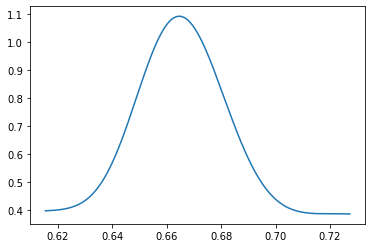

In [105]:
Ts = []
wl = []
for i in range(nfreq):
    
    wl = np.append(wl, 1/flux_freqs[i])
    Ts = np.append(Ts, bend_tran_flux[i]/straight_tran_flux[i])
plt.figure()
plt.plot(wl,Ts)

In [63]:
len(ss)

100